# Best-Practices Handbook - Non-Stationary

**Requirements**
1. Definition: Technical definition using formulas or equations ( Copy paste from
external sources with or without acknowledging the source is not ok. The
language should be your own. Turnitin will detect blocks of copy-pasted text)
2. Description: Written explanation (1–2 sentences)
3. Demonstration: Numerical example using either real-world data or simulated
data. Real-world data is likely more interesting, but simulated data allows us to
concentrate on the issues in isolation and thus create clear examples of what
happens.
3. Diagram: Visual example using the real-world data or simulated data that were
utilized in the Demonstration.
4. Diagnosis: Describe how to recognize or test that the problem exists
5. Damage: Clear statement of the damaged caused by the problem
6. Directions: Suggested models or methodologies that can address the particular
issue(s) you considered.

### Description

Non-stationary data refers to time series data that experience changes with time. Often this affects the distribution's mean, variance, and covariance, which can all be affected by certain trends or cycles, e.g. seasonality (Iordanova, 2022). For data analysis that include multiple timeseries, e.g. to calculate the historical correlation of two assets over the last month, relationship (here correlation) tends to change over time as well. 

### Definition

From a technical perspective, non-stationary data includes a time dependent element, expressed by `t` that accompanies the variables in the regular formulas for the distribution describing statistics. The equations for mean and variance are below:

$$
\mathbb{E}[X_t] = \mu_t
$$

$$
\text{Var}(X_t) = \sigma_t^2
$$

### Demonstration & Diagram

To demonstrate the changes of data with time, we can look at the moving average of a timeseries. If data was stationary, the moving average would be constant. 

In [21]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [2]:
nokia_data = yf.download('NOK', start='2020-01-01')
nokia_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,3.84,3.89,3.82,3.87,3.583044,33109500
2020-01-03,3.83,3.87,3.81,3.81,3.527492,25010100
2020-01-06,3.83,3.99,3.82,3.94,3.647853,59904600
2020-01-07,3.96,4.01,3.94,3.95,3.657112,36689900
2020-01-08,4.02,4.05,4.01,4.02,3.721921,32084900


In [14]:
nokia_data['moving_avg_21'] = nokia_data['Adj Close'].rolling(window=21).mean() #21 trading days is ca. 1 month
nokia_data['moving_avg_63'] = nokia_data['Adj Close'].rolling(window=63).mean() #63 trading days is ca. 1 quarter
nokia_data['sample_mean'] = nokia_data['Adj Close'].mean()
nokia_data.tail()

,Open,High,Low,Close,Adj Close,Volume,moving_avg,moving_avg_21,moving_avg_63,sample_mean
Date,,,,,,,,,,
2024-05-17,3.90,3.93,3.88,3.91,3.91,7002000,3.720810,3.720810,3.567521,4.190693
2024-05-20,3.87,3.87,3.81,3.81,3.81,12029500,3.736667,3.736667,3.573277,4.190693
2024-05-21,3.81,3.85,3.79,3.84,3.84,11072100,3.743810,3.743810,3.578882,4.190693
2024-05-22,3.89,3.96,3.88,3.95,3.95,13216500,3.756667,3.756667,3.585449,4.190693
2024-05-23,3.91,3.92,3.85,3.85,3.85,11977400,3.766191,3.766191,3.591056,4.190693


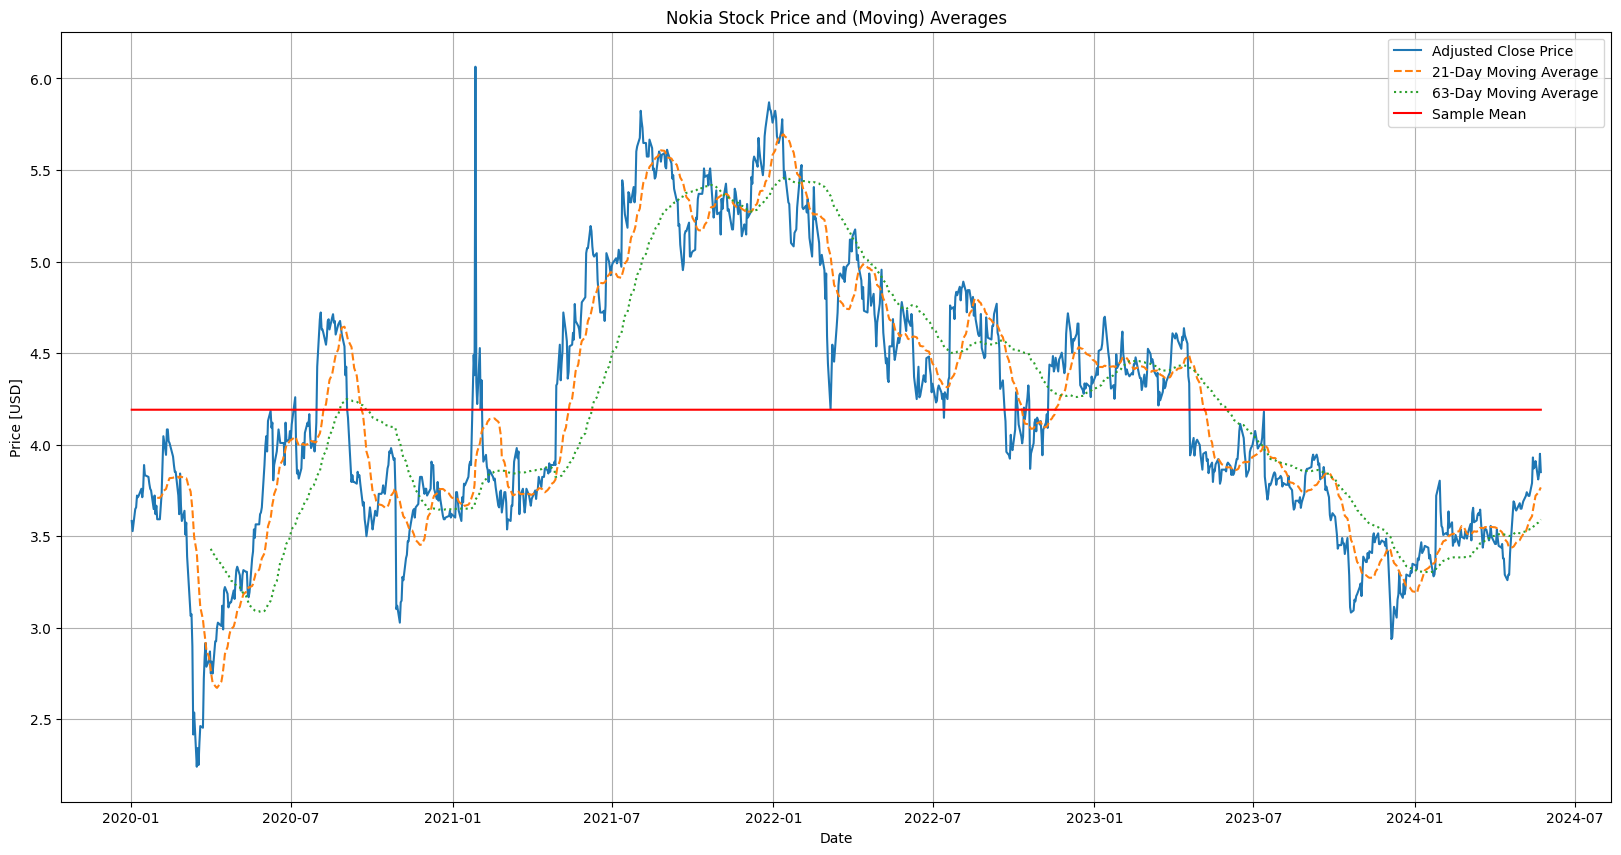

In [19]:
plt.figure(figsize=(20, 10))
plt.plot(nokia_data['Adj Close'], label='Adjusted Close Price')
plt.plot(nokia_data['moving_avg_21'], label='21-Day Moving Average', linestyle='--')
plt.plot(nokia_data['moving_avg_63'], label='63-Day Moving Average', linestyle='dotted')
plt.plot(nokia_data['sample_mean'], label='Sample Mean', c='red')
plt.title('Nokia Stock Price and (Moving) Averages')
plt.xlabel('Date')
plt.ylabel('Price [USD]')
plt.legend()
plt.grid(True)
plt.show()

### Diagnosis

The above graph shows that the average stock price of Nokia fluctuates with time. We see that the average stock price depends on the time period selected as well as the lookback window. Plotting the moving averages against the sample mean clearly shows the fluctuation of the mean with time. Note that if a different sample length was selected, the mean would again be different as well.

Additionally, we can run the Augmented Dickey-Fuller (ADF) Test which helps us understand whether a time series is static (Tate, 2023). The test sets the null hypothesis that the data is non-stationary. If the calculated p-value is less than 0.05, we can reject the null hypothesis and assume the time series is static.

In [23]:
adf_result = adfuller(nokia_data['Adj Close'])
p_value = adf_result[1]
print(f'ADF p-value: {p_value:.4f}')

ADF p-value: 0.1334


As we can see, the p-value exceeds 0.05. Therefore, we cannot reject the null hypothesis and can conclude we are dealing with non-stationary data.

### Damage

The issue with non-stationary data is that stationary is a fundamental assumption for various time series models, including ARIMA (Tate, 2023).

### References

1. Iordanova, Tzveta. "An Introduction to Processes.", 5 Jan. 2022, www.investopedia.com/articles/trading/07/stationary.asp. 
2. Tate, Andrew. "Understanding the Importance of Stationarity in Time Series.", 1 Dec. 2023, hex.tech/blog/stationarity-in-time-series/#:~:text=Non%2Dstationary%20data%20can%20lead,Easier%20modeling%20and%20forecasting. 
